# COVID-19

In [0]:
import pandas as pd
import seaborn as sns
sns.set()

df = pd.read_csv('https://raw.githubusercontent.com/open-covid-19/data/master/output/world.csv')
df['Confirmed'] = df['Confirmed'].astype(float)
df['Deaths'] = df['Deaths'].astype(float)
#df = df.set_index('Date')

In [2]:
df.tail()

,Date,CountryCode,CountryName,Confirmed,Deaths,Latitude,Longitude
5179,2020-03-16,VA,Vatican City,1.0,0.0,41.902916,12.453389
5180,2020-03-16,VE,Venezuela,15.0,0.0,6.423750,-66.589730
5181,2020-03-16,VN,Vietnam,57.0,0.0,14.058324,108.277199
5182,2020-03-16,XK,Kosovo,2.0,0.0,42.602636,20.902977
5183,2020-03-16,ZA,South Africa,51.0,0.0,-30.559482,22.937506


In [3]:
df_ITA = df.query('CountryCode in ["IT"]')
print(df_ITA)

            Date CountryCode CountryName  ...  Deaths  Latitude  Longitude
35    2019-12-31          IT       Italy  ...     0.0  41.87194   12.56738
101   2020-01-01          IT       Italy  ...     0.0  41.87194   12.56738
167   2020-01-02          IT       Italy  ...     0.0  41.87194   12.56738
233   2020-01-03          IT       Italy  ...     0.0  41.87194   12.56738
299   2020-01-04          IT       Italy  ...     0.0  41.87194   12.56738
...          ...         ...         ...  ...     ...       ...        ...
4708  2020-03-12          IT       Italy  ...   827.0  41.87194   12.56738
4796  2020-03-13          IT       Italy  ...  1016.0  41.87194   12.56738
4888  2020-03-14          IT       Italy  ...  1268.0  41.87194   12.56738
4995  2020-03-15          IT       Italy  ...  1441.0  41.87194   12.56738
5117  2020-03-16          IT       Italy  ...  1811.0  41.87194   12.56738

[77 rows x 7 columns]


In [4]:
df_ITA.columns

Index(['Date', 'CountryCode', 'CountryName', 'Confirmed', 'Deaths', 'Latitude',
       'Longitude'],
      dtype='object')

In [5]:
df_ITA.tail()

,Date,CountryCode,CountryName,Confirmed,Deaths,Latitude,Longitude
4708,2020-03-12,IT,Italy,12462.0,827.0,41.87194,12.56738
4796,2020-03-13,IT,Italy,15113.0,1016.0,41.87194,12.56738
4888,2020-03-14,IT,Italy,17660.0,1268.0,41.87194,12.56738
4995,2020-03-15,IT,Italy,20603.0,1441.0,41.87194,12.56738
5117,2020-03-16,IT,Italy,23980.0,1811.0,41.87194,12.56738


In [0]:
Confermati = df_ITA.loc[:,['Date','Confirmed']]
df_1 = pd.DataFrame(Confermati)

In [7]:
df_1.columns = ['ds', 'y']
print(df_1.head())

             ds    y
35   2019-12-31  0.0
101  2020-01-01  0.0
167  2020-01-02  0.0
233  2020-01-03  0.0
299  2020-01-04  0.0


In [8]:
from fbprophet import Prophet as pp
m = pp()
m.fit(df_1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future = m.make_future_dataframe(periods=30, freq='D')
future.tail()

,ds
102,2020-04-11
103,2020-04-12
104,2020-04-13
105,2020-04-14
106,2020-04-15


In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
102,2020-04-11,38110.560599,34843.531396,41132.406042
103,2020-04-12,39148.132161,35783.804178,42613.174407
104,2020-04-13,40275.794538,36699.777952,43693.332944
105,2020-04-14,40411.094054,36885.768665,43863.249188
106,2020-04-15,41276.844904,37464.515815,44834.228051


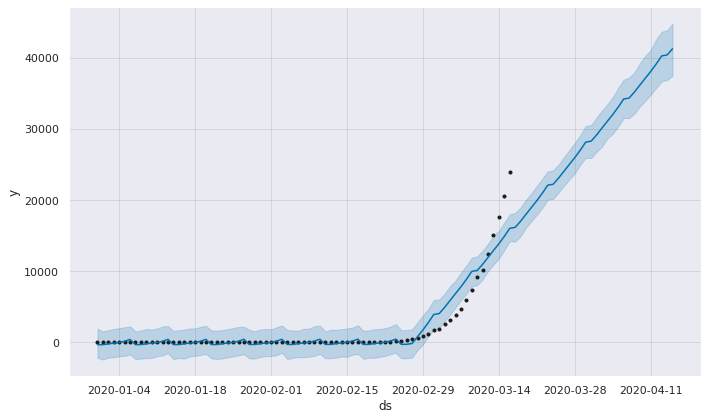

In [11]:
fig1 = m.plot(forecast)

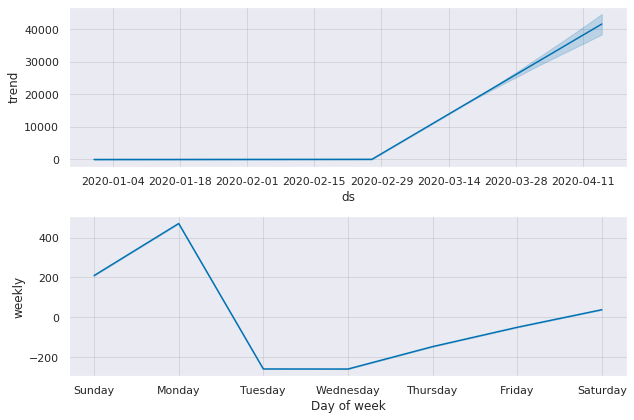

In [12]:
fig2 = m.plot_components(forecast)

In [0]:
Decessi = df_ITA.loc[:,['Date','Deaths']]
df_2 = pd.DataFrame(Decessi)

In [14]:
df_2.columns = ['ds', 'y']
print(df_2.head())

             ds    y
35   2019-12-31  0.0
101  2020-01-01  0.0
167  2020-01-02  0.0
233  2020-01-03  0.0
299  2020-01-04  0.0


In [15]:
m = pp()
m.fit(df_2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
102,2020-04-11,635.295381,263.347746,983.417739
103,2020-04-12,655.302729,284.918303,1004.236654
104,2020-04-13,701.672862,336.466472,1022.573931
105,2020-04-14,603.080761,264.193622,935.203268
106,2020-04-15,621.371791,267.730038,1014.537693


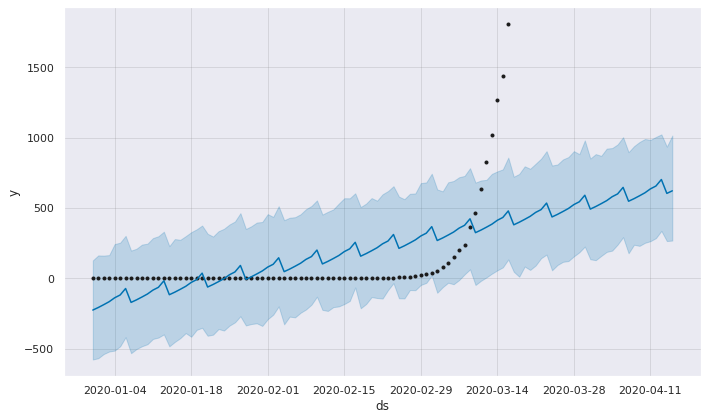

In [17]:
fig1 = m.plot(forecast)

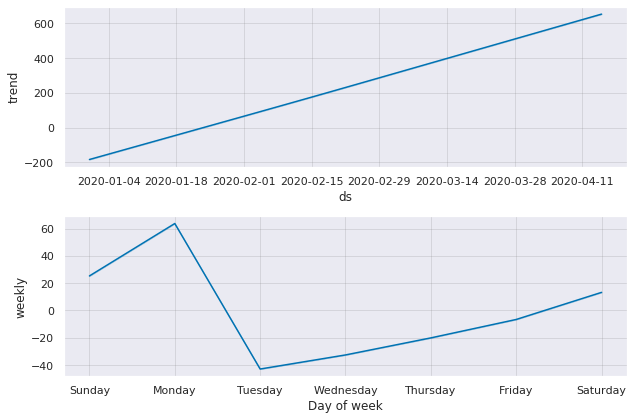

In [18]:
fig2 = m.plot_components(forecast)